In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


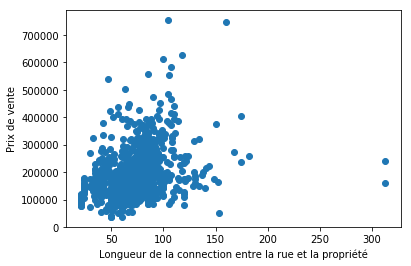

In [16]:
plt.scatter(dataset["LotFrontage"], dataset["SalePrice"])
plt.xlabel("Longueur de la connection entre la rue et la propriété")
plt.ylabel("Prix de vente")
plt.show()

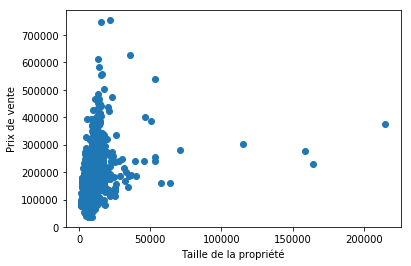

In [119]:
plt.scatter(dataset["LotArea"], dataset["SalePrice"])
plt.xlabel("Taille de la propriété")
plt.ylabel("Prix de vente")
plt.show()

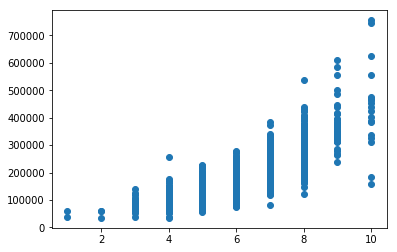

In [40]:
plt.scatter(dataset["OverallQual"], dataset["SalePrice"])
plt.show()

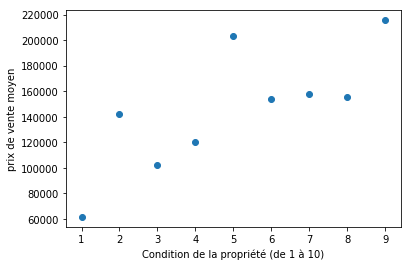

In [120]:
plot = dataset.groupby("OverallCond")["SalePrice"].mean()
plt.scatter(np.unique(dataset["OverallCond"]), plot)
plt.xlabel("Condition de la propriété (de 1 à 10)")
plt.ylabel("prix de vente moyen")
plt.show()

In [104]:
plot = dataset.groupby("OverallQual")["SalePrice"].mean()
print(plot)

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


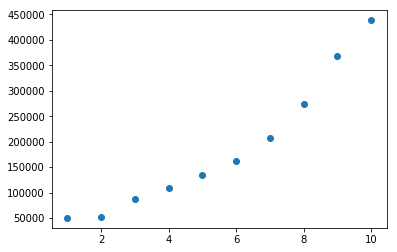

In [105]:
plt.scatter(np.unique(dataset["OverallQual"]), plot)
plt.show()

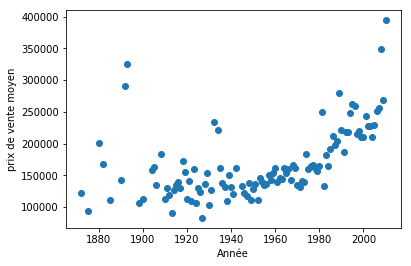

In [121]:
plot = plot = dataset.groupby("YearBuilt")["SalePrice"].mean()
plt.scatter(np.unique(dataset["YearBuilt"]), plot)
plt.xlabel("Année")
plt.ylabel("prix de vente moyen")
plt.show()

In [122]:

# Detecting Nan

def isnan(dataframe, column):
    for i in range(0, column):
            if dataframe.iloc[:,i].isnull().any() == True:
                print("Column ", i, "has Nan")
                

isnan(dataset, 81)


Column  3 has Nan
Column  6 has Nan
Column  25 has Nan
Column  26 has Nan
Column  30 has Nan
Column  31 has Nan
Column  32 has Nan
Column  33 has Nan
Column  35 has Nan
Column  42 has Nan
Column  57 has Nan
Column  58 has Nan
Column  59 has Nan
Column  60 has Nan
Column  63 has Nan
Column  64 has Nan
Column  72 has Nan
Column  73 has Nan
Column  74 has Nan


In [5]:
def isString(dataframe, column):
    k = 0
    for i in range(0, column):
            if type(dataframe.iloc[:,i].any()) == str:
                k += 1
                print("Column ", i, "is a string")
    print("A total of ", k, "columns are string")
                
isString(dataset, 81)

Column  2 is a string
Column  5 is a string
Column  6 is a string
Column  7 is a string
Column  8 is a string
Column  9 is a string
Column  10 is a string
Column  11 is a string
Column  12 is a string
Column  13 is a string
Column  14 is a string
Column  15 is a string
Column  16 is a string
Column  21 is a string
Column  22 is a string
Column  23 is a string
Column  24 is a string
Column  25 is a string
Column  27 is a string
Column  28 is a string
Column  29 is a string
Column  30 is a string
Column  31 is a string
Column  32 is a string
Column  33 is a string
Column  35 is a string
Column  39 is a string
Column  40 is a string
Column  41 is a string
Column  42 is a string
Column  53 is a string
Column  55 is a string
Column  57 is a string
Column  58 is a string
Column  60 is a string
Column  63 is a string
Column  64 is a string
Column  65 is a string
Column  72 is a string
Column  73 is a string
Column  74 is a string
Column  78 is a string
Column  79 is a string
A total of  43 co

In [29]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, 80:81].values

In [31]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN", strategy = "median", axis = 0)
imputer.fit(X[:, [2, 25, 58]])
X[:,[2, 25, 58]] = imputer.transform(X[:, [2, 25, 58]])


In [44]:
X = pd.DataFrame(X)
X = X.fillna("None")
X.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


In [56]:
X = X.values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
k = []
for i in range(0,79):
    if type(X[0,i]) == str:        
        X[:,i] = labelencoder.fit_transform(X[:,i])
        k +=[i]
        
onehotencoder = OneHotEncoder(categorical_features = [k])    
X = onehotencoder.fit_transform(X).toarray()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [61]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

y_pred_lr = regressor_lr.predict(X_test)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [108]:
overview_y_pred = y_pred_lr
overview_y_test = y_test

overview = pd.DataFrame(data=np.column_stack((overview_y_pred,overview_y_test)),
                        columns=['Predictions','Valeurs Réelles'])

overview.head()

,Predictions,Valeurs Réelles
0,225233.601653,232000.0
1,244050.852788,272000.0
2,120529.590659,125500.0
3,146783.645654,145000.0
4,194548.255553,175000.0


In [109]:
accuracy_lr = []
        
for i in range (0, 292):
    if y_test[i] - y_pred_lr[i] < 0:
        accuracy_lr.append(y_pred_lr[i] - y_test[i])
    else:
        accuracy_lr.append(y_test[i] - y_pred_lr[i])


accuracy_lr = np.asarray(accuracy_lr)
accuracy_lr.mean()

16624.588136347786

In [113]:
print(y_test.mean())

174454.57876712328
